# Simple Linear Regression Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The simple regression model estimates the relationship between two variables $x_i$ and $y_i$

$$
y_i = \alpha + \beta x_i + \epsilon_i, i = 1,2,...,N
$$

where $\epsilon_i$ represents the error between the line of best fit and the sample values for $y_i$ given $x_i$.

Our goal is to choose values for $\alpha$ and $\beta$ to build a line of "best" fit for some data that is available for variables $x_i$ and $y_i$. 

Let us consider a simple dataset of 10 observations for variables $x_i$ and $y_i$:

| | $y_i$  | $x_i$ |
|-|---|---|
|1| 2000 | 32 |
|2| 1000 | 21 | 
|3| 1500 | 24 | 
|4| 2500 | 35 | 
|5| 500 | 10 |
|6| 900 | 11 |
|7| 1100 | 22 | 
|8| 1500 | 21 | 
|9| 1800 | 27 |
|10 | 250 | 2 |

Let us think about $y_i$ as sales for an ice-cream cart, while $x_i$ is a variable that records the day's temperature in Celsius.

In [2]:
x = [32, 21, 24, 35, 10, 11, 22, 21, 27, 2]
y = [2000,1000,1500,2500,500,900,1100,1500,1800, 250]
df = pd.DataFrame([x,y]).T
df.columns = ['X', 'Y']
df

,X,Y
0,32,2000
1,21,1000
2,24,1500
3,35,2500
4,10,500
5,11,900
6,22,1100
7,21,1500
8,27,1800
9,2,250


We can use a scatter plot of the data to see the relationship between $y_i$ (ice-cream sales in dollars (\$\'s)) and $x_i$ (degrees Celsius).

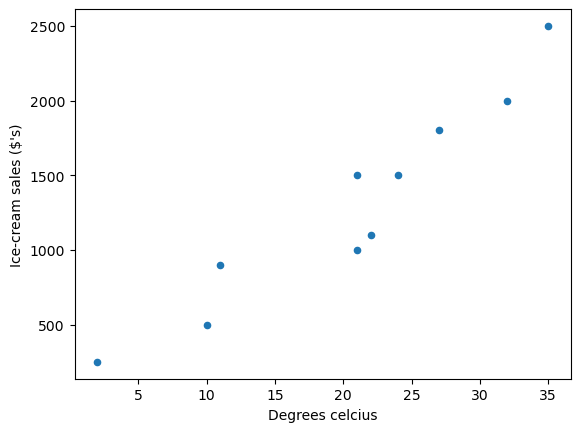

In [3]:
ax = df.plot(
    x='X', 
    y='Y', 
    kind='scatter', 
    ylabel='Ice-cream sales ($\'s)', 
    xlabel='Degrees celcius'
)

as you can see the data suggests that more ice-cream is typically sold on hotter days. 

To build a linear model of the data we need to choose values for $\alpha$ and $\beta$ that represents a line of "best" fit such that

$$
\hat{y_i} = \hat{\alpha} + \hat{\beta} x_i
$$

Let's start with $\alpha = 5$ and $\beta = 10$

In [4]:
α = 5
β = 10
df['Y_hat'] = α + β * df['X']

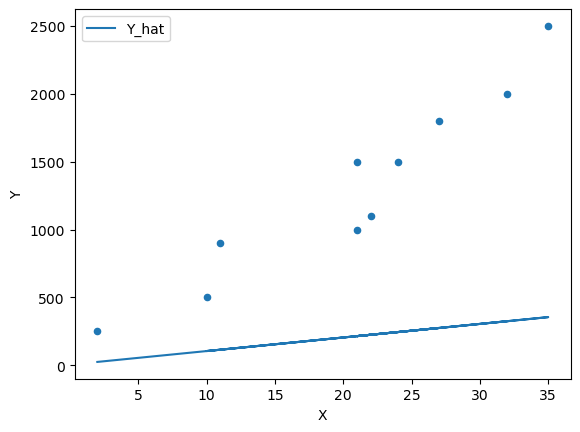

In [5]:
fig, ax = plt.subplots()
ax = df.plot(x='X',y='Y', kind='scatter', ax=ax)
ax = df.plot(x='X',y='Y_hat', kind='line', ax=ax)
plt.show()

We can see that this model does a poor job of estimating the relationship.

We can continue to guess and iterate towards a line of "best" fit by adjusting the parameters

In [6]:
β = 100
df['Y_hat'] = α + β * df['X']

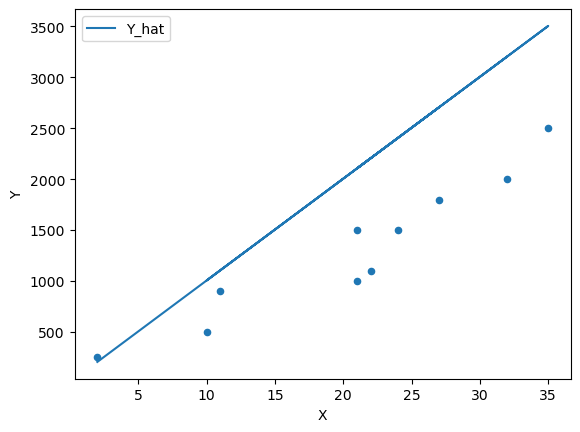

In [7]:
fig, ax = plt.subplots()
ax = df.plot(x='X',y='Y', kind='scatter', ax=ax)
ax = df.plot(x='X',y='Y_hat', kind='line', ax=ax)
plt.show()

In [8]:
β = 65
df['Y_hat'] = α + β * df['X']

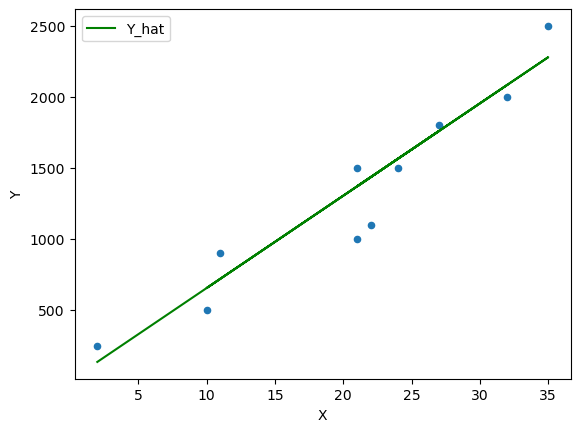

In [9]:
fig, ax = plt.subplots()
ax = df.plot(x='X',y='Y', kind='scatter', ax=ax)
ax = df.plot(x='X',y='Y_hat', kind='line', ax=ax, color='g')
plt.show()

However we need to think about formalizing this guessing process by thinking of this problem as an optimization problem. 

Let's consider the error $\epsilon_i$ and define the difference between the observed values $y_i$ and the estimated values $\hat{y}_i$ which we will call the residuals

$$
\begin{aligned}
\hat{e}_i &= y_i - \hat{y}_i \\
          &= y_i - \hat{\alpha} - \hat{\beta} x_i
\end{aligned}
$$

In [10]:
df['error'] = df['Y_hat'] - df['Y']

In [11]:
df

,X,Y,Y_hat,error
0,32,2000,2085,85
1,21,1000,1370,370
2,24,1500,1565,65
3,35,2500,2280,-220
4,10,500,655,155
5,11,900,720,-180
6,22,1100,1435,335
7,21,1500,1370,-130
8,27,1800,1760,-40
9,2,250,135,-115


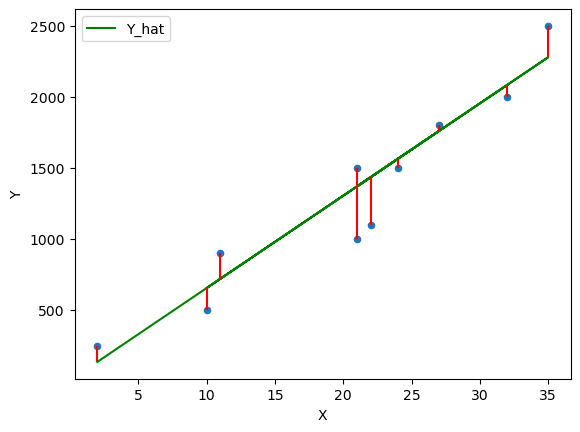

In [12]:
fig, ax = plt.subplots()
ax = df.plot(x='X',y='Y', kind='scatter', ax=ax)
ax = df.plot(x='X',y='Y_hat', kind='line', ax=ax, color='g')
plt.vlines(df['X'], df['Y_hat'], df['Y'], color='r')
plt.show()

The Ordinary Least Squares (OLS) method chooses $\alpha$ and $\beta$ in such a way that **minimizes** the sum of the squared residuals (SSR). 

$$
\min_{\alpha,\beta} \sum_{i=1}^{N}{\hat{e}_i^2} = \min_{\alpha,\beta} \sum_{i=1}^{N}{(y_i - \alpha - \beta x_i)^2}
$$

Let's call this a cost function

$$
C = \sum_{i=1}^{N}{(y_i - \alpha - \beta x_i)^2}
$$

that we would like to minimize with parameters $\alpha$ and $\beta$.

## How does error change with respect to $\alpha$ and $\beta$

Let us first look at how the total error changes with respect to $\beta$ (holding the intercept $\alpha$ constant)

We know from [the next section](slr:optimal-values) the optimal values for $\alpha$ and $\beta$  are:

In [13]:
β_optimal = 64.38
α_optimal = -14.72

We can then calculate the error for a range of $\beta$ values

In [14]:
errors = {}
for β in np.arange(20,100,0.5):
    errors[β] = abs((α_optimal + β * df['X']) - df['Y']).sum()

Plotting the error

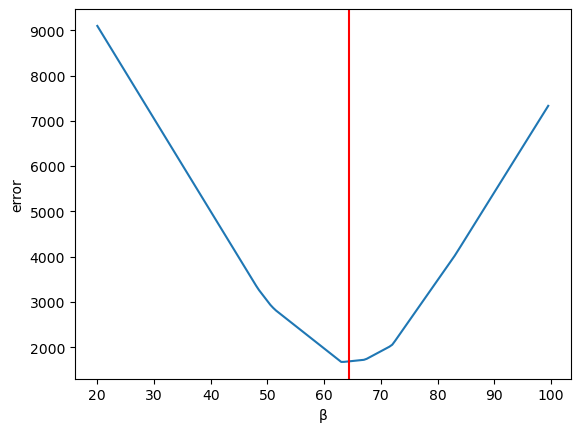

In [15]:
ax = pd.Series(errors).plot(xlabel='β', ylabel='error')
plt.axvline(β_optimal, color='r');

Now let us vary $\alpha$ (holding $\beta$ constant)

In [16]:
errors = {}
for α in np.arange(-500,500,5):
    errors[α] = abs((α + β_optimal * df['X']) - df['Y']).sum()

Plotting the error

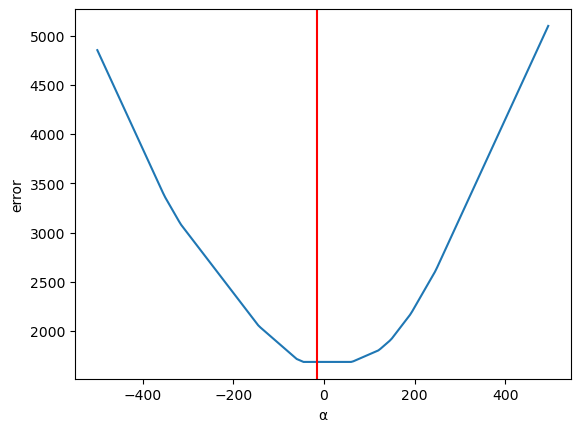

In [17]:
ax = pd.Series(errors).plot(xlabel='α', ylabel='error')
plt.axvline(α_optimal, color='r');

(slr:optimal-values)=
## Calculating optimal values

Now let us use calculus to solve the optimization problem and compute the optimal values for $\alpha$ and $\beta$ to find the ordinary least squares solution.

First taking the partial derivative with respect to $\alpha$

$$
\frac{\partial C}{\partial \alpha}[\sum_{i=1}^{N}{(y_i - \alpha - \beta x_i)^2}]
$$

and setting it equal to $0$

$$
0 = \sum_{i=1}^{N}{-2(y_i - \alpha - \beta x_i)}
$$

we can remove the constant $-2$ from the summation by dividing both sides by $-2$

$$
0 = \sum_{i=1}^{N}{(y_i - \alpha - \beta x_i)}
$$

Now we can split this equation up into the components

$$
0 = \sum_{i=1}^{N}{y_i} - \sum_{i=1}^{N}{\alpha} - \beta \sum_{i=1}^{N}{x_i}
$$

The middle term is a straight forward sum from $i=1,...N$ by a constant $\alpha$

$$
0 = \sum_{i=1}^{N}{y_i} - N*\alpha - \beta \sum_{i=1}^{N}{x_i}
$$

and rearranging terms 

$$
\alpha = \frac{\sum_{i=1}^{N}{y_i} - \beta \sum_{i=1}^{N}{x_i}}{N}
$$

We observe that both fractions resolve to the means $\bar{y_i}$ and $\bar{x_i}$

$$
\alpha = \bar{y_i} - \beta\bar{x_i}
$$ (eq:optimal-alpha)

Now let's take the partial derivative of the cost function $C$ with respect to $\beta$

$$
\frac{\partial C}{\partial \beta}[\sum_{i=1}^{N}{(y_i - \alpha - \beta x_i)^2}]
$$

and setting it equal to $0$

$$
0 = \sum_{i=1}^{N}{-2 x_i (y_i - \alpha - \beta x_i)}
$$

we can again take the constant outside of the summation and divide both sides by $-2$

$$
0 = \sum_{i=1}^{N}{x_i (y_i - \alpha - \beta x_i)}
$$

which becomes

$$
0 = \sum_{i=1}^{N}{(x_i y_i - \alpha x_i - \beta x_i^2)}
$$

now substituting for $\alpha$

$$
0 = \sum_{i=1}^{N}{(x_i y_i - (\bar{y_i} - \beta \bar{x_i}) x_i - \beta x_i^2)}
$$

and rearranging terms

$$
0 = \sum_{i=1}^{N}{(x_i y_i - \bar{y_i} x_i - \beta \bar{x_i} x_i - \beta x_i^2)}
$$

This can be split into two summations

$$
0 = \sum_{i=1}^{N}(x_i y_i - \bar{y_i} x_i) + \beta \sum_{i=1}^{N}(\bar{x_i} x_i - x_i^2)
$$

and solving for $\beta$ yields

$$
\beta = \frac{\sum_{i=1}^{N}(x_i y_i - \bar{y_i} x_i)}{\sum_{i=1}^{N}(x_i^2 - \bar{x_i} x_i)}
$$ (eq:optimal-beta)

We can now use {eq}`eq:optimal-alpha` and {eq}`eq:optimal-beta` to calculate the optimal values for $\alpha$ and $\beta$

Calculating $\beta$

In [18]:
df = df[['X','Y']].copy()  # Original Data

# Calculate the sample means
x_bar = df['X'].mean()
y_bar = df['Y'].mean()

Now computing across the 10 observations and then summing the numerator and denominator

In [19]:
# Compute the Sums
df['num'] = df['X'] * df['Y'] - y_bar * df['X']
df['den'] = pow(df['X'],2) - x_bar * df['X']
β = df['num'].sum() / df['den'].sum()
print(β)

64.37665782493369


Calculating $\alpha$

In [20]:
α = y_bar - β * x_bar
print(α)

-14.72148541114052


Now we can plot the OLS solution

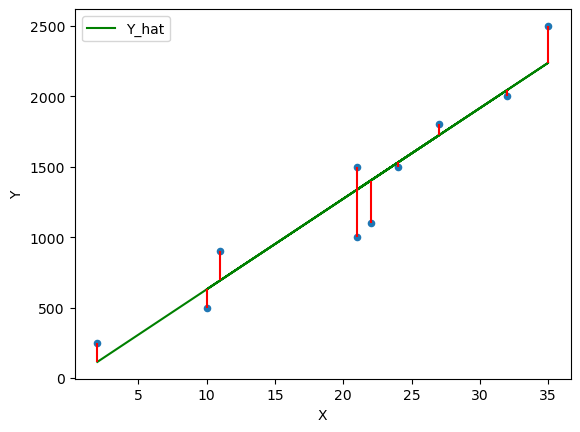

In [21]:
df['Y_hat'] = α + β * df['X']
df['error'] = df['Y_hat'] - df['Y']

fig, ax = plt.subplots()
ax = df.plot(x='X',y='Y', kind='scatter', ax=ax)
ax = df.plot(x='X',y='Y_hat', kind='line', ax=ax, color='g')
plt.vlines(df['X'], df['Y_hat'], df['Y'], color='r');

:::{exercise}
:label: slr-ex1

Now that you know the equations that solve the simple linear regression model using OLS you can now run your own regressions to build a model between $y$ and $x$.

Let's consider two economic variables GDP per capita and Life Expectancy.

1. What do you think their relationship would be?
2. Gather some data [from our world in data](https://ourworldindata.org)
3. Use `pandas` to import the `csv` formatted data and plot a few different countries of interest
4. Use {eq}`eq:optimal-alpha` and {eq}`eq:optimal-beta` to compute optimal values for  $\alpha$ and $\beta$
5. Plot the line of best fit found using OLS
6. Interpret the coefficients and write a summary sentence of the relationship between GDP per capita and Life Expectancy

:::

:::{solution-start} slr-ex1
:::

**Q2:** Gather some data [from our world in data](https://ourworldindata.org)

:::{raw} html
<iframe src="https://ourworldindata.org/grapher/life-expectancy-vs-gdp-per-capita" loading="lazy" style="width: 100%; height: 600px; border: 0px none;"></iframe>
:::

You can download {download}`a copy of the data here <https://github.com/QuantEcon/lecture-python-intro/raw/main/lectures/_static/lecture_specific/simple_linear_regression/life-expectancy-vs-gdp-per-capita.csv>` if you get stuck

**Q3:** Use `pandas` to import the `csv` formatted data and plot a few different countries of interest

In [22]:
data_url = "https://github.com/QuantEcon/lecture-python-intro/raw/main/lectures/_static/lecture_specific/simple_linear_regression/life-expectancy-vs-gdp-per-capita.csv"
df = pd.read_csv(data_url, nrows=10)

In [23]:
df

,Entity,Code,Year,Life expectancy at birth (historical),GDP per capita,417485-annotations,Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1950,27.7,1156.0,NaN,7480464.0,NaN
2,Afghanistan,AFG,1951,28.0,1170.0,NaN,7571542.0,NaN
3,Afghanistan,AFG,1952,28.4,1189.0,NaN,7667534.0,NaN
4,Afghanistan,AFG,1953,28.9,1240.0,NaN,7764549.0,NaN
5,Afghanistan,AFG,1954,29.2,1245.0,NaN,7864289.0,NaN
6,Afghanistan,AFG,1955,29.9,1246.0,NaN,7971933.0,NaN
7,Afghanistan,AFG,1956,30.4,1278.0,NaN,8087730.0,NaN
8,Afghanistan,AFG,1957,30.9,1253.0,NaN,8210207.0,NaN
9,Afghanistan,AFG,1958,31.5,1298.0,NaN,8333827.0,NaN


You can see that the data downloaded from Our World in Data has provided a global set of countries with the GDP per capita and Life Expectancy Data.

It is often a good idea to at first import a few lines of data from a csv to understand its structure so that you can then choose the columns that you want to read into your DataFrame.

You can observe that there are a bunch of columns we won't need to import such as `Continent`

So let's built a list of the columns we want to import

In [24]:
cols = ['Code', 'Year', 'Life expectancy at birth (historical)', 'GDP per capita']
df = pd.read_csv(data_url, usecols=cols)
df

,Code,Year,Life expectancy at birth (historical),GDP per capita
0,OWID_ABK,2015,NaN,NaN
1,AFG,1950,27.7,1156.0
2,AFG,1951,28.0,1170.0
3,AFG,1952,28.4,1189.0
4,AFG,1953,28.9,1240.0
...,...,...,...,...
62151,ZWE,1946,NaN,NaN
62152,ZWE,1947,NaN,NaN
62153,ZWE,1948,NaN,NaN
62154,ZWE,1949,NaN,NaN


Sometimes it can be useful to rename your columns to make it easier to work with in the DataFrame

In [25]:
df.columns = ["cntry", "year", "life_expectancy", "gdppc"]
df

,cntry,year,life_expectancy,gdppc
0,OWID_ABK,2015,NaN,NaN
1,AFG,1950,27.7,1156.0
2,AFG,1951,28.0,1170.0
3,AFG,1952,28.4,1189.0
4,AFG,1953,28.9,1240.0
...,...,...,...,...
62151,ZWE,1946,NaN,NaN
62152,ZWE,1947,NaN,NaN
62153,ZWE,1948,NaN,NaN
62154,ZWE,1949,NaN,NaN


We can see there are `NaN` values which represents missing data so let us go ahead and drop those

In [26]:
df.dropna(inplace=True)

In [27]:
df

,cntry,year,life_expectancy,gdppc
1,AFG,1950,27.7,1156.0000
2,AFG,1951,28.0,1170.0000
3,AFG,1952,28.4,1189.0000
4,AFG,1953,28.9,1240.0000
5,AFG,1954,29.2,1245.0000
...,...,...,...,...
61960,ZWE,2014,58.8,1594.0000
61961,ZWE,2015,59.6,1560.0000
61962,ZWE,2016,60.3,1534.0000
61963,ZWE,2017,60.7,1582.3662


We have now dropped the number of rows in our DataFrame from 62156 to 12445 removing a lot of empty data relationships.

Now we have a dataset containing life expectancy and GDP per capita for a range of years.

It is always a good idea to spend a bit of time understanding what data you actually have. 

For example, you may want to explore this data to see if there is consistent reporting for all countries across years

Let's first look at the Life Expectancy Data

In [28]:
le_years = df[['cntry', 'year', 'life_expectancy']].set_index(['cntry', 'year']).unstack()['life_expectancy']
le_years

year,1543,1548,1553,1558,1563,1568,1573,1578,1583,1588,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
cntry,,,,,,,,,,,,,,,,,,,,,
AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.4,60.9,61.4,61.9,62.4,62.5,62.7,63.1,63.0,63.1
AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.8,56.7,57.6,58.6,59.3,60.0,60.7,61.1,61.7,62.1
ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,77.8,77.9,78.1,78.1,78.1,78.4,78.6,78.9,79.0,79.2
ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78.0,78.3,78.5,78.7,78.9,79.0,79.2,79.3,79.5,79.6
ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.9,75.7,76.1,76.5,76.5,76.8,76.8,76.3,76.8,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VNM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.5,73.5,73.7,73.7,73.8,73.9,73.9,73.9,74.0,74.0
YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67.2,67.3,67.4,67.3,67.5,67.4,65.9,66.1,66.0,64.6
ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,57.4,58.9,60.7,61.8,62.5,63.4,63.9,64.7,65.4,65.7


As you can see there are a lot of countries where data is not available for the Year 1543!

Which country does report this data?

In [29]:
le_years[~le_years[1543].isna()]

year,1543,1548,1553,1558,1563,1568,1573,1578,1583,1588,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
cntry,,,,,,,,,,,,,,,,,,,,,
GBR,33.94,38.82,39.59,22.38,36.66,39.67,41.06,41.56,42.7,37.05,...,80.2,80.4,80.8,80.9,80.9,81.2,80.9,81.1,81.2,81.1


You can see that Great Britain (GBR) is the only one available

You can also take a closer look at the time series to find that it is also non-continuous, even for GBR.

<Axes: xlabel='year'>

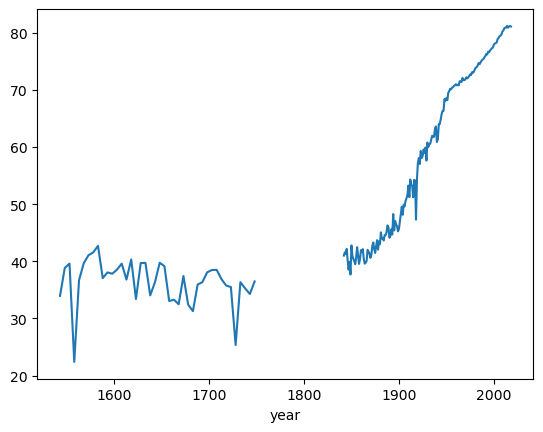

In [30]:
le_years.loc['GBR'].plot()

In fact we can use pandas to quickly check how many countries are captured in each year

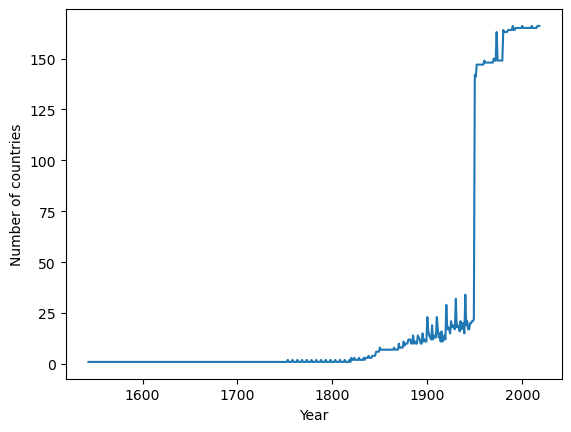

In [31]:
le_years.stack().unstack(level=0).count(axis=1).plot(xlabel="Year", ylabel="Number of countries");

So it is clear that if you are doing cross-sectional comparisons then more recent data will include a wider set of countries

Now let us consider the most recent year in the dataset 2018

In [32]:
df = df[df.year == 2018].reset_index(drop=True).copy()

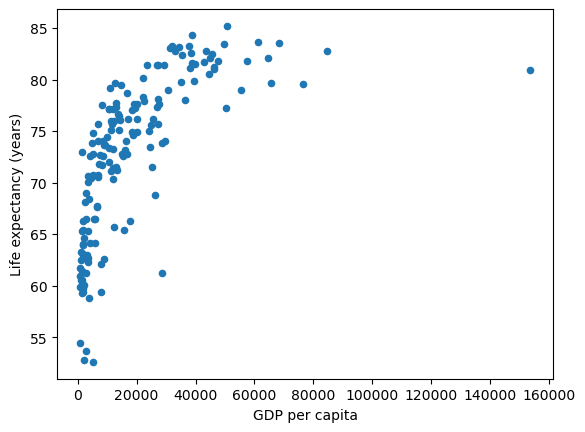

In [33]:
df.plot(x='gdppc', y='life_expectancy', kind='scatter',  xlabel="GDP per capita", ylabel="Life expectancy (years)",);

This data shows a couple of interesting relationships.

1. there are a number of countries with similar GDP per capita levels but a wide range in Life Expectancy
2. there appears to be a positive relationship between GDP per capita and life expectancy. Countries with higher GDP per capita tend to have higher life expectancy outcomes

Even though OLS is solving linear equations -- one option we have is to transform the variables, such as through a log transform, and then use OLS to estimate the transformed variables.

By specifying `logx` you can plot the GDP per Capita data on a log scale

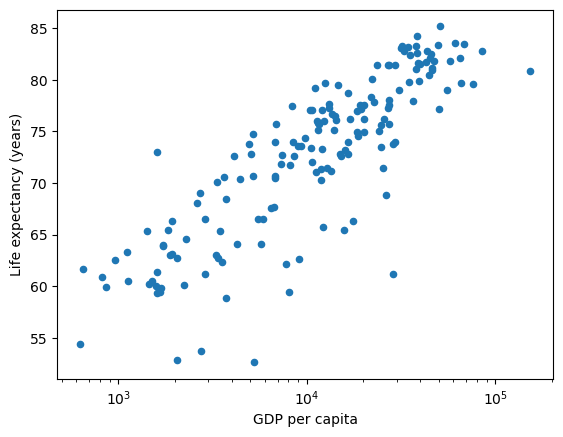

In [34]:
df.plot(x='gdppc', y='life_expectancy', kind='scatter',  xlabel="GDP per capita", ylabel="Life expectancy (years)", logx=True);

As you can see from this transformation -- a linear model fits the shape of the data more closely.

In [35]:
df['log_gdppc'] = df['gdppc'].apply(np.log10)

In [36]:
df

,cntry,year,life_expectancy,gdppc,log_gdppc
0,AFG,2018,63.1,1934.5550,3.286581
1,ALB,2018,79.2,11104.1660,4.045486
2,DZA,2018,76.1,14228.0250,4.153145
3,AGO,2018,62.1,7771.4420,3.890502
4,ARG,2018,77.0,18556.3830,4.268493
...,...,...,...,...,...
161,VNM,2018,74.0,6814.1420,3.833411
162,OWID_WRL,2018,72.6,15212.4150,4.182198
163,YEM,2018,64.6,2284.8900,3.358865
164,ZMB,2018,62.3,3534.0337,3.548271


**Q4:** Use {eq}`eq:optimal-alpha` and {eq}`eq:optimal-beta` to compute optimal values for  $\alpha$ and $\beta$

In [37]:
data = df[['log_gdppc', 'life_expectancy']].copy()  # Get Data from DataFrame

# Calculate the sample means
x_bar = data['log_gdppc'].mean()
y_bar = data['life_expectancy'].mean()

In [38]:
data

,log_gdppc,life_expectancy
0,3.286581,63.1
1,4.045486,79.2
2,4.153145,76.1
3,3.890502,62.1
4,4.268493,77.0
...,...,...
161,3.833411,74.0
162,4.182198,72.6
163,3.358865,64.6
164,3.548271,62.3


In [39]:
# Compute the Sums
data['num'] = data['log_gdppc'] * data['life_expectancy'] - y_bar * data['log_gdppc']
data['den'] = pow(data['log_gdppc'],2) - x_bar * data['log_gdppc']
β = data['num'].sum() / data['den'].sum()
print(β)

12.643730292819708


In [40]:
α = y_bar - β * x_bar
print(α)

21.70209670138904


**Q5:** Plot the line of best fit found using OLS

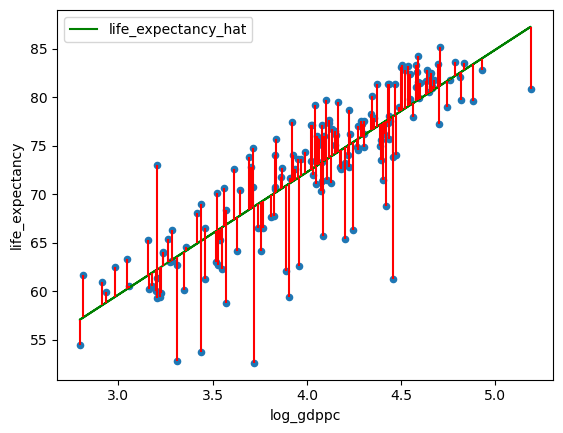

In [41]:
data['life_expectancy_hat'] = α + β * df['log_gdppc']
data['error'] = data['life_expectancy_hat'] - data['life_expectancy']

fig, ax = plt.subplots()
data.plot(x='log_gdppc',y='life_expectancy', kind='scatter', ax=ax)
data.plot(x='log_gdppc',y='life_expectancy_hat', kind='line', ax=ax, color='g')
plt.vlines(data['log_gdppc'], data['life_expectancy_hat'], data['life_expectancy'], color='r')

:::{solution-end}
:::

:::{exercise}
:label: slr-ex2

Minimizing the sum of squares is not the **only** way to generate the line of best fit. 

For example, we could also consider minimizing the sum of the **absolute values**, that would give less weight to outliers. 

Solve for $\alpha$ and $\beta$ using the least absolute values
:::